# 실습과제3

보스턴 주택 데이터셋을 활용하여 Linear Regression을 학습시키시오.
1. 데이터를 시각화 하시오.
2. 회귀 계수, MSE, RMSE를 산출하시오
3. 어떤 변수가 가격에 어떠한 영향을 미치고 있는지 간략히 서술 하시오.

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
from sklearn.datasets import load_boston
boston = load_boston()

/opt/homebrew/Caskroom/miniforge/base/envs/tf25/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets in

# 데이터 시각화

In [15]:
df = pd.DataFrame(boston.data, columns=boston.feature_names) #Dataframe
df['y'] = boston.target #make target column
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

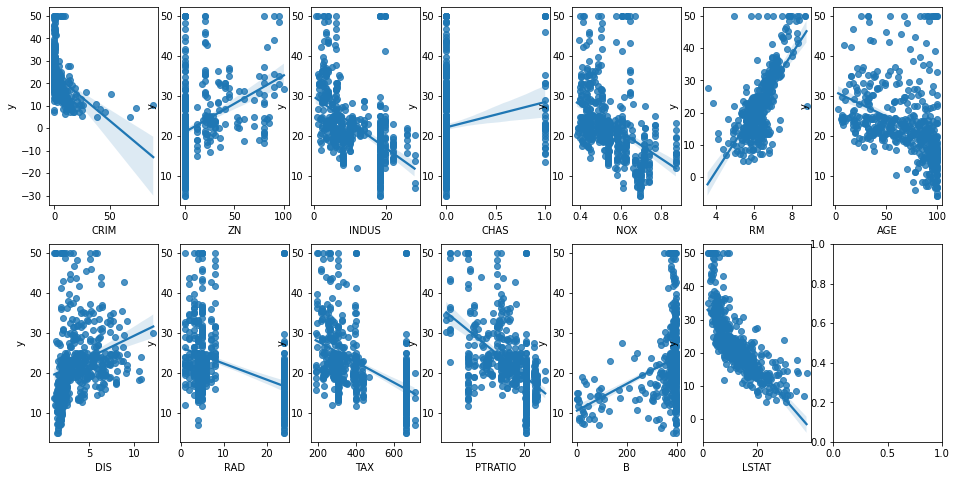

In [31]:
# data = boston.feature_names
# tmp = []
# for i in range(len(data)):
#     t = (i,data[i])
#     tmp.append(t)
    
# fig, axs = plt.subplots(figsize = (16, 8), ncols = 5, nrows = 2)
fig, axs = plt.subplots(figsize = (16, 8), ncols = 7, nrows = 2)
for i, feature in enumerate(boston.feature_names):
    row = int(i/7)
    col = i%7
    sns.regplot(data = df, x = feature, y = 'y', ax = axs[row][col])

# 모델 학습

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = boston.data
y = boston.target

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
lin_reg.intercept_, lin_reg.coef_ #coef = 계수 , intercept = 상수 

(31.22646236482823,
 array([-9.62677805e-02,  4.58403839e-02,  1.68589207e-02,  3.59545656e+00,
        -1.90173156e+01,  4.24296126e+00,  1.31751330e-02, -1.38036743e+00,
         3.03024557e-01, -1.15420503e-02, -8.87520457e-01,  1.08290708e-02,
        -5.25212073e-01]))

# 회귀계수 및 MSE, RMSE

In [36]:
coeff = pd.Series(data=np.round(lin_reg.coef_, 1), index=boston.feature_names)
coeff.sort_values(ascending=False)

RM          4.2
CHAS        3.6
RAD         0.3
ZN          0.0
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -0.9
DIS        -1.4
NOX       -19.0
dtype: float64

In [35]:
y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_pred, Y_test)
print("MSE: ",mse)
print("RMSE: ",np.sqrt(mse))

MSE:  26.944812249518417
RMSE:  5.190839262539192


#변수들에 대한 간략한 설명

##### 일단 계수가 의미있는 칼럼명들의 뜻을 파악해볼 때 RM, CHAS가 유의미하게 나타났다. 이 칼럼들의 뜻은  RM의 경우 가구별 방의 수이며, CHAS의 경우 강주변에 사는지에 대한 두가지 범주형 칼럼이다.  CHAS의 경우 범주형 자료이기 때문에 의미가 크게 있을지 의문이며, 그래프상 보았을때 LSTATS, DIS, AGE는 결과에 어느정도 영향이 가는 피처가 아닐까 생각이 들었다. 확실한 것은 가구별 방의 수 즉 방의 수는 집의 넓이와 연관이 클 것이며 일반적인 상식으로 집의 넓이가 크다면 가격이 비쌀 것이라는 통념이 그대로 반영된 것으로 보인다.  추가적으로 타겟값의 최상위 값인 50이 50이상의 값들에 대해서도 모두 50으로 통일 된 것으로보아 타겟값 50의 경우는 지워서 다시 모델을 학습시키면 좋은 결과를 얻을 수 있을 것 같다.

